In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/shinchan/Downloads/Coronavirus Tweets.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.shape

(41157, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
columns_to_drop = ['UserName','ScreenName']
df.drop(columns= columns_to_drop,inplace = True , axis = 1)

In [7]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
df.isna().sum()

Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [10]:
df['Location'].unique().shape

(12221,)

In [11]:
df.duplicated().sum()

0

In [12]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

## Visualisation

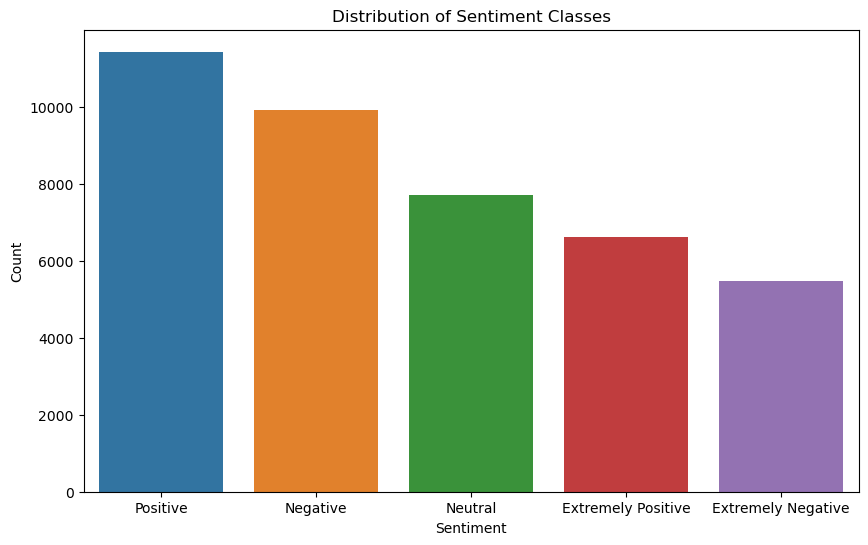

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

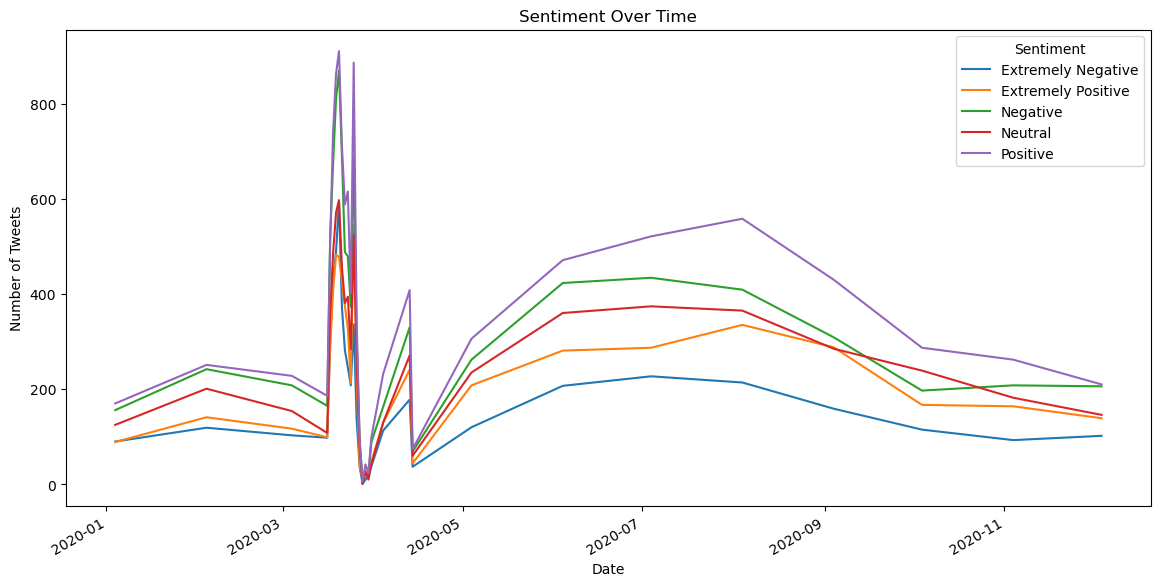

In [14]:
# Convert 'TweetAt' to datetime
df['TweetAt'] = pd.to_datetime(df['TweetAt'])

# Group by date and sentiment
sentiment_time_series = df.groupby(['TweetAt', 'Sentiment']).size().unstack().fillna(0)

# Plot sentiment over time
sentiment_time_series.plot(kind='line', figsize=(14, 7), title='Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()


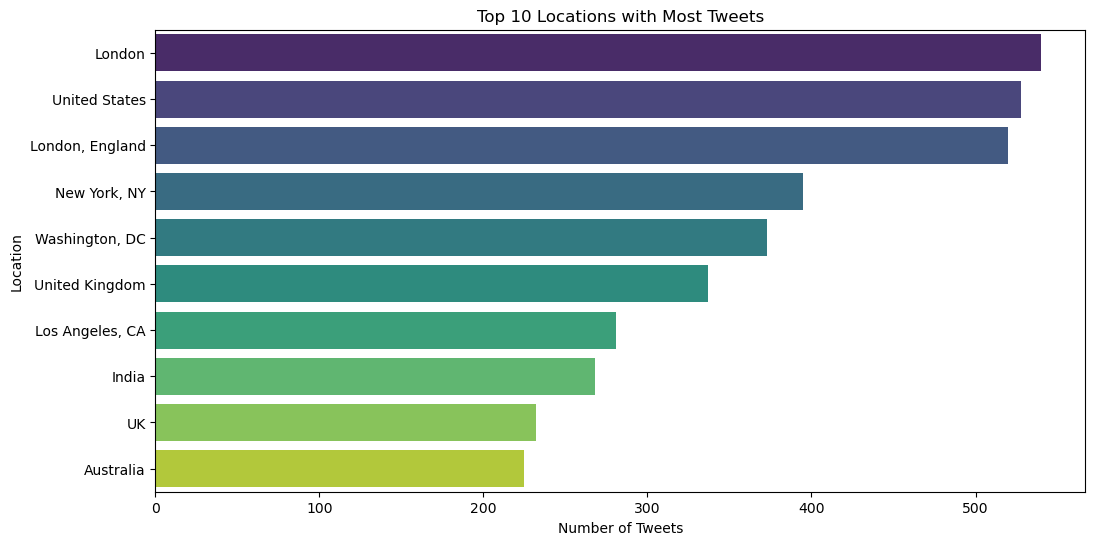

In [15]:
# Plot top locations
top_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
plt.title('Top 10 Locations with Most Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')
plt.show()

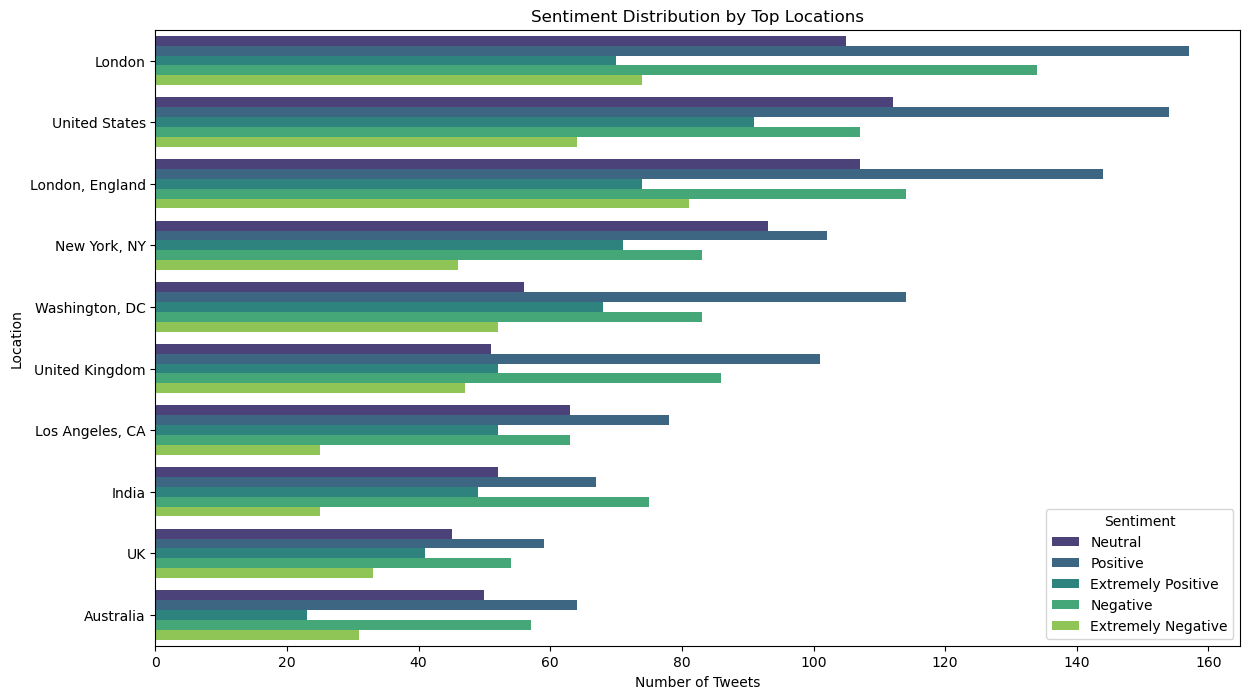

In [16]:
# Filter top locations
top_location_df = df[df['Location'].isin(top_locations.index)]

# Plot sentiment distribution by top locations
plt.figure(figsize=(14, 8))
sns.countplot(y='Location', hue='Sentiment', data=top_location_df, order=top_locations.index, palette='viridis')
plt.title('Sentiment Distribution by Top Locations')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')
plt.show()

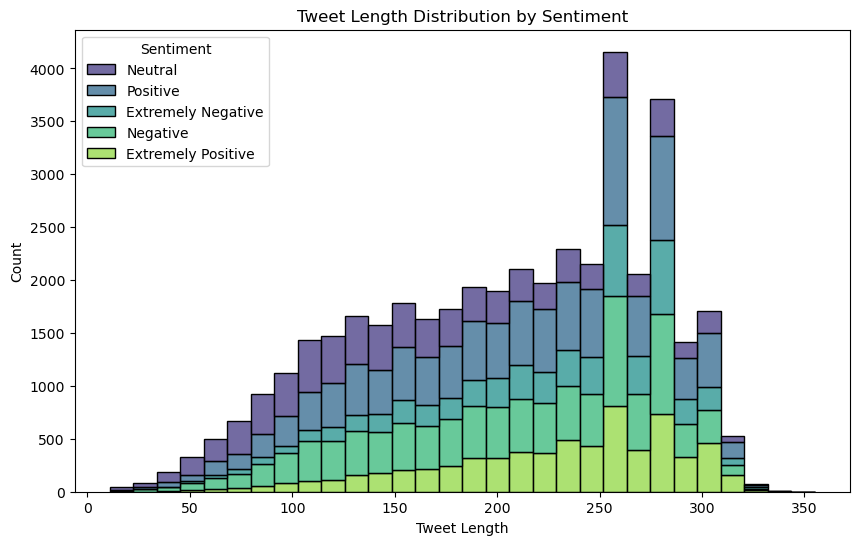

In [17]:
# Calculate tweet lengths
df['TweetLength'] = df['OriginalTweet'].apply(len)

# Plot tweet length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TweetLength', hue='Sentiment', multiple='stack', palette='viridis', bins=30)
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()

In [18]:
# Drop rows where Location is null
df = df.dropna(subset=['Location'])

In [19]:
# # Fill null values in Location with 'Unknown'
# df['Location'] = df['Location'].fillna('Unknown')

In [20]:
df.shape

(32567, 5)

# Text preprocessing:

### Lowercasing:

In [21]:
df['Location'] = df['Location'].str.lower()
df['OriginalTweet'] = df['OriginalTweet'].str.lower()

In [22]:
#generally we apply this step if we had web scrapped our data set from
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return re.sub(pattern, '', text)

In [23]:
df['Location'] = df['Location'].apply(remove_html_tags)
df['OriginalTweet'] = df['OriginalTweet'].apply(remove_html_tags)

### URL handling

In [24]:
def remove_urls(text):
  pattern= re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'', text)

In [25]:
df['Location'] = df['Location'].apply(remove_urls)
df['OriginalTweet'] = df['OriginalTweet'].apply(remove_urls)

### Punctuation removal:

In [26]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def remove_punc1(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [28]:
start = time.time()
df['Location'] = df['Location'].apply(remove_punc1)
df['OriginalTweet'] = df['OriginalTweet'].apply(remove_punc1)
time2 = time.time()
print(time2-start)

0.26064085960388184


### Chat word Removal:

In [29]:
chat_words_dict = {
    'u': 'you',
    'ur': 'your',
    'r': 'are',
    'lol': 'laughing out loud',
    'omg': 'oh my god',
    'idk': 'I do not know',
    'btw': 'by the way',
    'brb': 'be right back',
    'b4': 'before',
    'gr8': 'great',
    'bday': 'birthday',
    'plz': 'please',
    'thx': 'thanks',
    'np': 'no problem',
    'cuz': 'because',
    'msg': 'message',
    'wanna': 'want to',
    'gonna': 'going to'
    # Add more chat words as needed
}

In [30]:
import re

def replace_chat_words(text, chat_words_dict):
    chat_words_re = re.compile(r'\b(' + '|'.join(chat_words_dict.keys()) + r')\b')
    return chat_words_re.sub(lambda x: chat_words_dict[x.group()], text)


In [31]:
# Define the function to preprocess the text
def preprocess_text(text):
    # Replace chat words
    text = replace_chat_words(text, chat_words_dict)
    return text

In [32]:
df['Location'] = df['Location'].apply(preprocess_text)
df['OriginalTweet'] = df['OriginalTweet'].apply(preprocess_text)

### Stop word Removal:

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Function to remove stopwords from text without using word_tokenize
def remove_stopwords(text):
    # Split the text into words based on spaces
    words = text.split()
    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df['Location'] = df['Location'].apply(remove_stopwords)
df['OriginalTweet'] = df['OriginalTweet'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shinchan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Spell Checker

In [34]:
# !pip install textblob

In [35]:
# from textblob import TextBlob
# # Function to correct spelling using TextBlob
# def correct_spelling(text):
#     blob = TextBlob(text)
#     return str(blob.correct())

In [36]:
# import pandas as pd
# from tqdm import tqdm  # Optional for progress bar

# # Assuming correct_spelling function is defined

# # Example batch size
# batch_size = 1000

# # Batch processing for Location column
# for i in tqdm(range(0, len(df['Location']), batch_size)):
#     df['Location'].iloc[i:i+batch_size] = df['Location'].iloc[i:i+batch_size].apply(correct_spelling)

# # Batch processing for OriginalTweet column
# for i in tqdm(range(0, len(df['OriginalTweet']), batch_size)):
#     df['OriginalTweet'].iloc[i:i+batch_size] = df['OriginalTweet'].iloc[i:i+batch_size].apply(correct_spelling)

In [37]:

# df['Location'] = df['Location'].apply(correct_spelling)
# df['OriginalTweet'] = df['OriginalTweet'].apply(correct_spelling)

In [38]:
# from multiprocessing import Pool

# # Example function for parallel processing
# def parallel_apply(column):
#     with Pool() as pool:
#         df[column] = pool.map(correct_spelling, df[column])

# # Apply in parallel
# parallel_apply('Location')
# parallel_apply('OriginalTweet')


In [39]:
# !pip install pyspellchecker


In [40]:
# import pandas as pd
# from spellchecker import SpellChecker
# from multiprocessing import Pool

# # Example function for batch processing with pyspellchecker
# def correct_spelling(text):
#     spell = SpellChecker()
#     corrected_text = []
#     for word in text.split():
#         corrected_text.append(spell.correction(word))
#     return ' '.join(corrected_text)

# # Example function for parallel processing with multiprocessing
# def parallel_apply(column):
#     with Pool() as pool:
#         return pool.map(correct_spelling, column)



# # Apply spell correction in parallel
# df['Location'] = parallel_apply(df['Location'])
# df['OriginalTweet'] = parallel_apply(df['OriginalTweet'])

# # Display the corrected DataFrame
# print(df)


### Emoji handling

In [41]:
!pip install emoji


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [42]:
import emoji

In [43]:
# Function to replace emojis with text descriptions
def replace_emojis(text):
    return emoji.demojize(text)

In [44]:
df['Location'] = df['Location'].apply(replace_emojis)
df['OriginalTweet'] = df['OriginalTweet'].apply(replace_emojis)

### Spacy using TOKENISATION

In [45]:
!pip install spacy
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [46]:
import spacy

In [47]:
# Load the SpaCy English language model
nlp = spacy.load('en_core_web_sm')

In [48]:
# Function to tokenize text using SpaCy
def spacy_tokenize(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return ' '.join(tokens)

In [49]:
df['Location'] = df['Location'].apply(spacy_tokenize)
df['OriginalTweet'] = df['OriginalTweet'].apply(spacy_tokenize)

### Stemming using PORTER STEMMER

In [50]:
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# nltk.download('punkt')
# nltk.download('wordnet')
# # Initialize the NLTK Porter stemmer
# stemmer = PorterStemmer()
# # Function to perform stemming on text
# def perform_stemming(text):
#     # Tokenize the text into words
#     words = word_tokenize(text)
#     # Perform stemming on each word
#     stemmed_words = [stemmer.stem(word) for word in words]
#     # Join the stemmed words back into a single string
#     stemmed_text = ' '.join(stemmed_words)
#     return stemmed_text

# df['Location'] = df['Location'].apply(perform_stemming)
# df['OriginalTweet'] = df['OriginalTweet'].apply(perform_stemming)

### lemmatisation for meaning full tokens

In [51]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the NLTK WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on text
def perform_lemmatization(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Perform lemmatization on each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a single string
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text


# Apply lemmatization to DataFrame columns
df['Location'] = df['Location'].apply(perform_lemmatization)
df['OriginalTweet'] = df['OriginalTweet'].apply(perform_lemmatization)


[nltk_data] Downloading package punkt to /Users/shinchan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shinchan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,TweetLength
0,london,2020-03-16,menyrbie philgahan chrisitv,Neutral,111
1,uk,2020-03-16,advice talk neighbour family exchange phone nu...,Positive,237
2,vagabond,2020-03-16,coronavirus australia woolworth give elderly d...,Positive,131
5,ãt 3631970882363649,2020-03-16,news regionâs first confirmed covid19 case ca...,Positive,250
6,3592654178753267,2020-03-16,cashier grocery store sharing insight covid19 ...,Positive,180


In [53]:
# Combine Location and OriginalTweet into a new column 'CombinedText'
df['CombinedText'] = df['Location'] + ' ' + df['OriginalTweet']

# Drop the OriginalTweet and TweetAt columns
df.drop(['OriginalTweet', 'TweetAt','Location'], axis=1, inplace=True)

# Display the updated DataFrame
df.head()

,Sentiment,TweetLength,CombinedText
0,Neutral,111,london menyrbie philgahan chrisitv
1,Positive,237,uk advice talk neighbour family exchange phone...
2,Positive,131,vagabond coronavirus australia woolworth give ...
5,Positive,250,ãt 3631970882363649 news regionâs first conf...
6,Positive,180,3592654178753267 cashier grocery store sharing...


In [54]:
total_words = df['CombinedText'].str.split().str.len().sum()
print(total_words)

674400


In [55]:
from nltk.tokenize import word_tokenize

# Tokenize the CombinedText column
df['TokenizedText'] = df['CombinedText'].apply(word_tokenize)

# Display the DataFrame with the tokenized text
df.head()

,Sentiment,TweetLength,CombinedText,TokenizedText
0,Neutral,111,london menyrbie philgahan chrisitv,"[london, menyrbie, philgahan, chrisitv]"
1,Positive,237,uk advice talk neighbour family exchange phone...,"[uk, advice, talk, neighbour, family, exchange..."
2,Positive,131,vagabond coronavirus australia woolworth give ...,"[vagabond, coronavirus, australia, woolworth, ..."
5,Positive,250,ãt 3631970882363649 news regionâs first conf...,"[ãt, 3631970882363649, news, regionâs, first..."
6,Positive,180,3592654178753267 cashier grocery store sharing...,"[3592654178753267, cashier, grocery, store, sh..."


### Vectorization:

In [56]:
from gensim.models import Word2Vec

# Prepare the sentences for Word2Vec
sentences = df['TokenizedText'].tolist()

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=200, window= 10, min_count=5, workers=5)

# Save the Word2Vec model
word2vec_model.save("word2vec.model")

In [57]:
# from gensim.models import Word2Vec

# # Load the Word2Vec model
# word2vec_model = Word2Vec.load("word2vec.model")

# # Extract word vectors
# word_vectors = word2vec_model.wv

# # Get the list of words in the vocabulary
# words = list(word_vectors.index_to_key)

# # Extract the vectors
# vectors = word_vectors[words]

In [58]:
# from sklearn.decomposition import PCA

# # Initialize PCA to reduce dimensions from 500 to 3
# pca = PCA(n_components=3)

# # Fit and transform the vectors
# reduced_vectors = pca.fit_transform(vectors)

In [59]:
# reduced_vectors.shape

In [60]:
# import numpy as np

# # Save the reduced vectors and the corresponding words
# np.save('reduced_vectors.npy', reduced_vectors)
# np.save('words.npy', words)


In [61]:
import numpy as np

# Function to get the vector for a sentence
def get_sentence_vector(sentence, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in sentence:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    if count > 0:
        vector /= count
    return vector

# Apply the function to get vectors for each sentence
df['SentenceVector'] = df['TokenizedText'].apply(lambda x: get_sentence_vector(x, word2vec_model))

# Display the DataFrame with sentence vectors
df.head()

,Sentiment,TweetLength,CombinedText,TokenizedText,SentenceVector
0,Neutral,111,london menyrbie philgahan chrisitv,"[london, menyrbie, philgahan, chrisitv]","[0.17268536984920502, 0.6736236214637756, 0.56..."
1,Positive,237,uk advice talk neighbour family exchange phone...,"[uk, advice, talk, neighbour, family, exchange...","[0.020790386288094202, -0.11422868881241552, 0..."
2,Positive,131,vagabond coronavirus australia woolworth give ...,"[vagabond, coronavirus, australia, woolworth, ...","[0.13637492759153247, 0.01778054889291525, 0.2..."
5,Positive,250,ãt 3631970882363649 news regionâs first conf...,"[ãt, 3631970882363649, news, regionâs, first...","[0.158589338235881, -0.4998207843821982, 0.408..."
6,Positive,180,3592654178753267 cashier grocery store sharing...,"[3592654178753267, cashier, grocery, store, sh...","[0.04462259801636849, -0.12136290548369288, 0...."


In [62]:
df['SentenceVector'][0].shape

(200,)

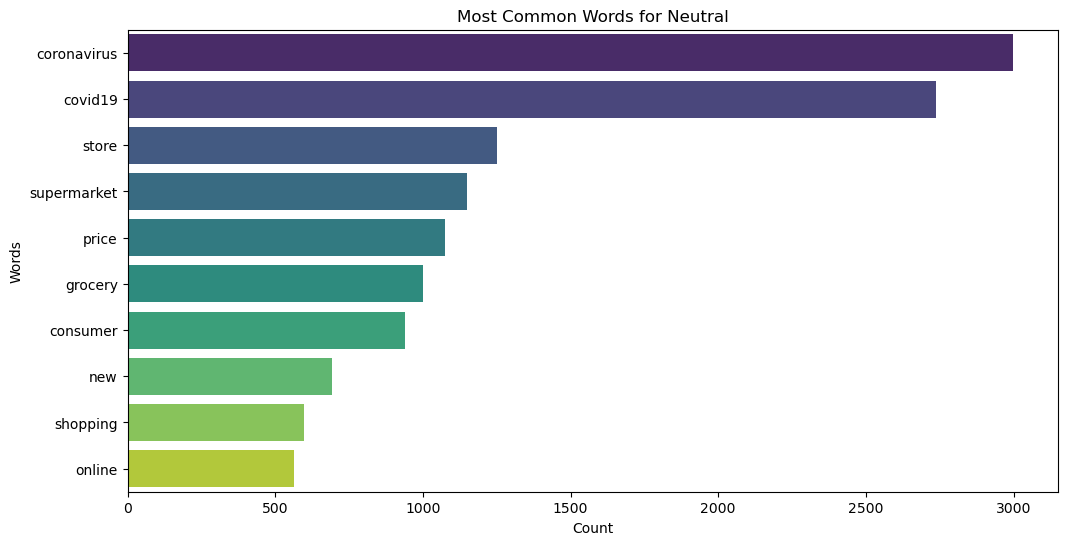

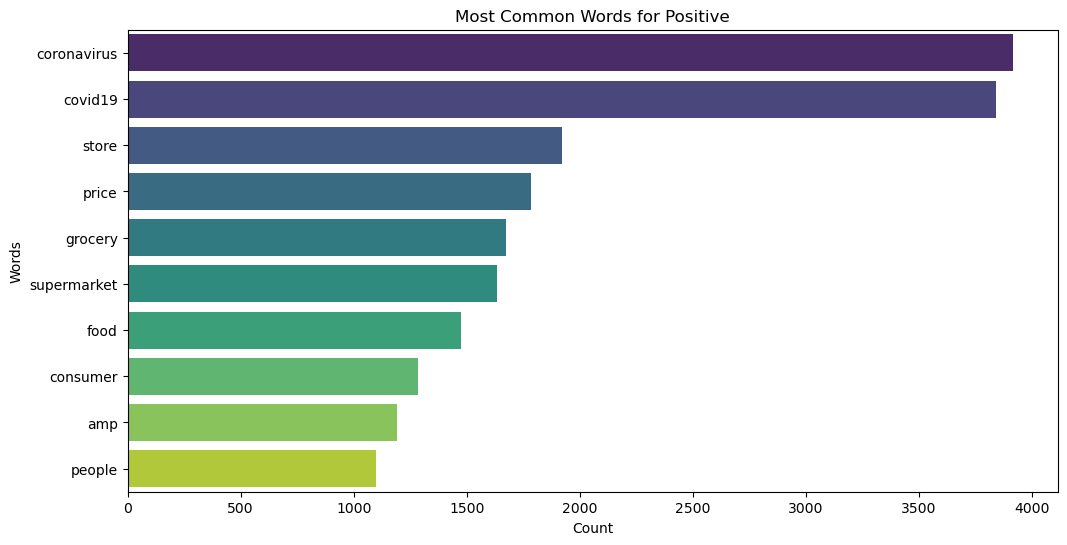

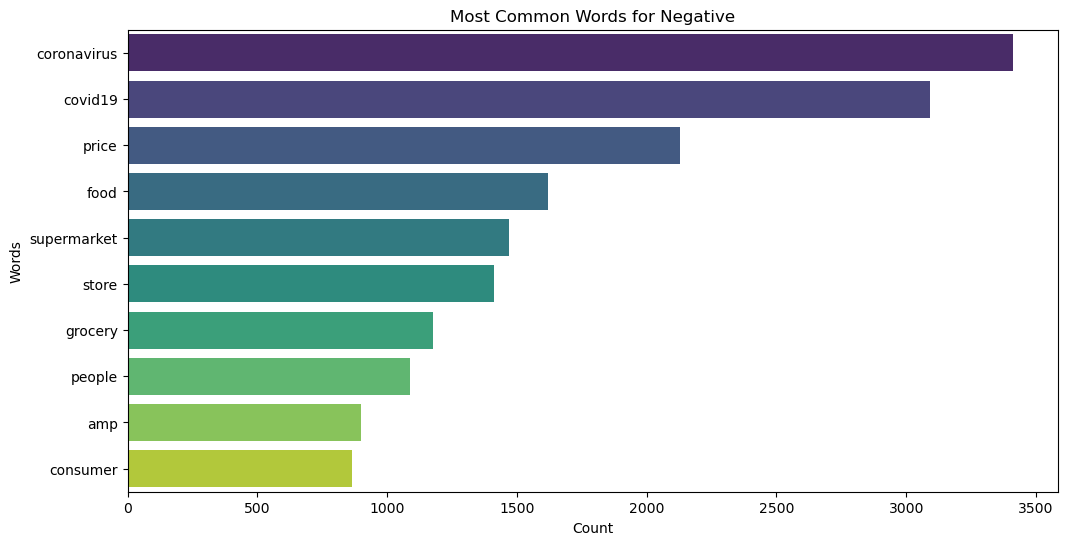

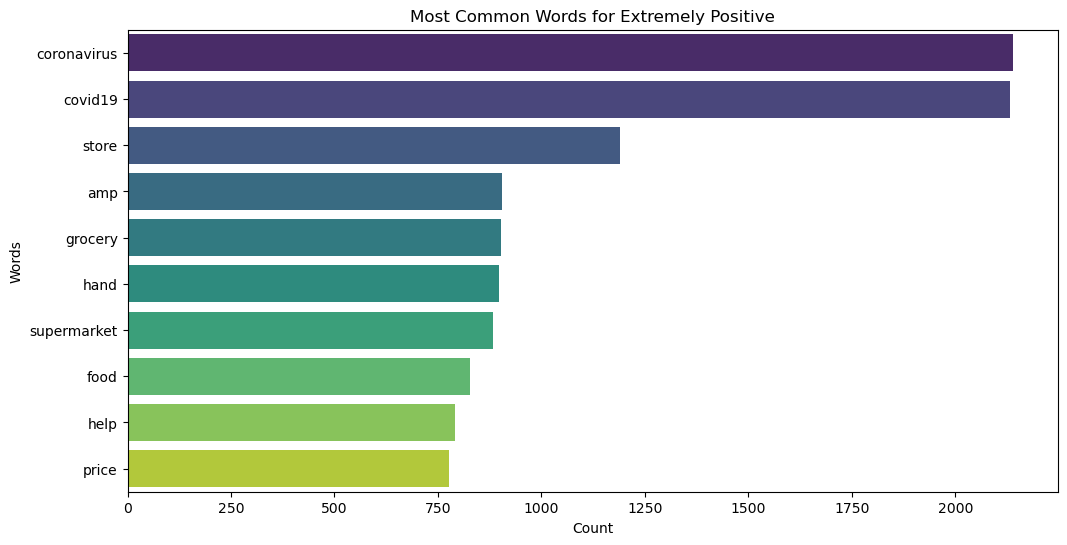

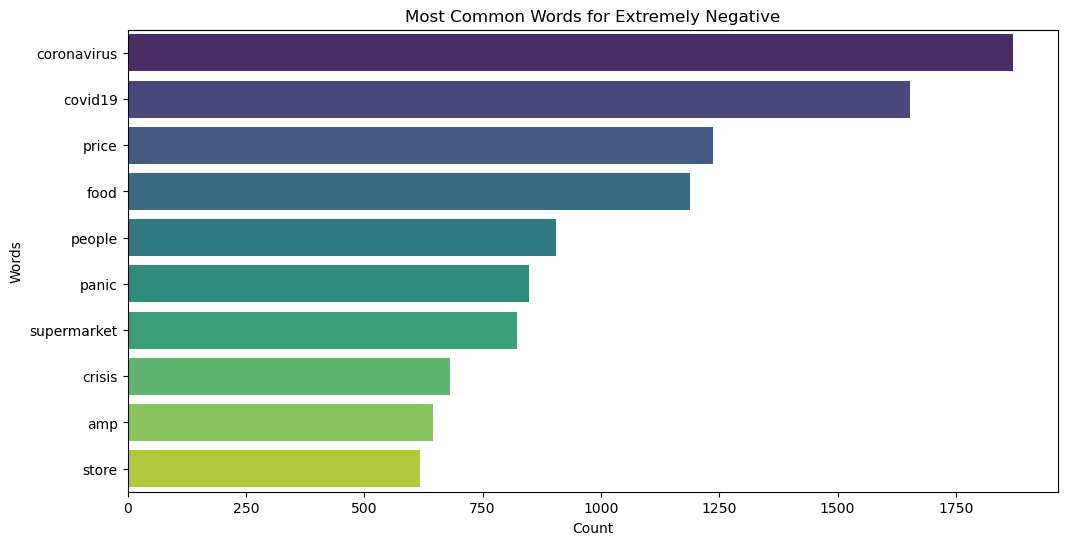

In [63]:
from collections import Counter
import numpy as np

# Function to get most common words
def get_most_common_words(text, n=10):
    words = text.split()
    return Counter(words).most_common(n)

# Plot most common words for each sentiment
for sentiment in df['Sentiment'].unique():
    sentiment_text = ' '.join(df[df['Sentiment'] == sentiment]['CombinedText'])
    common_words = get_most_common_words(sentiment_text)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=np.array(counts), y=np.array(words), palette='viridis')
    plt.title(f'Most Common Words for {sentiment}')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

In [64]:
!pip install wordcloud


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


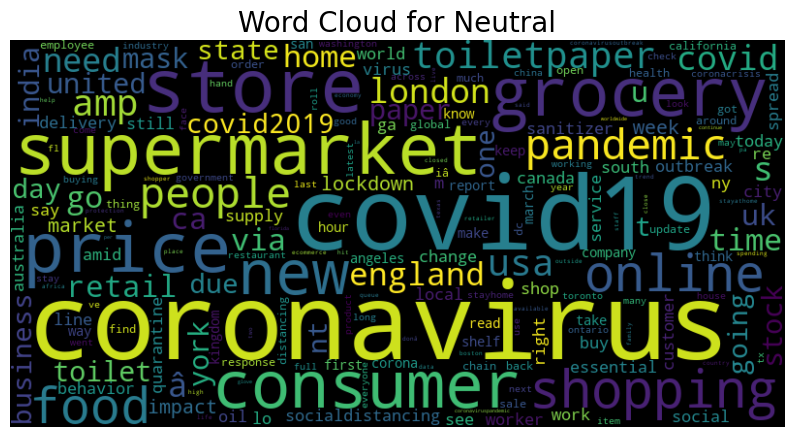

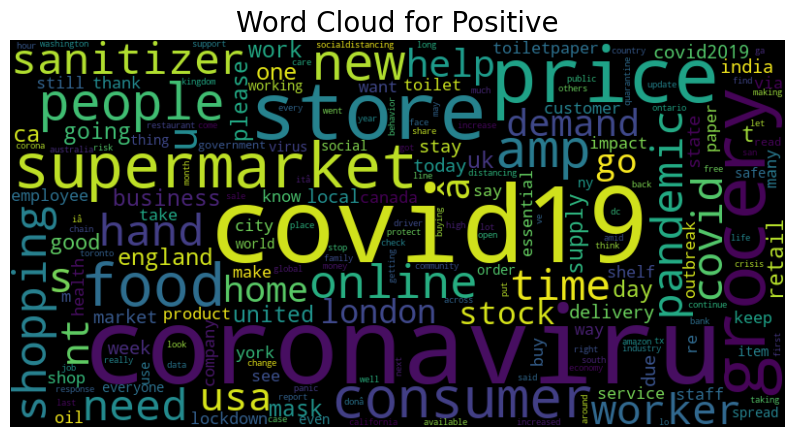

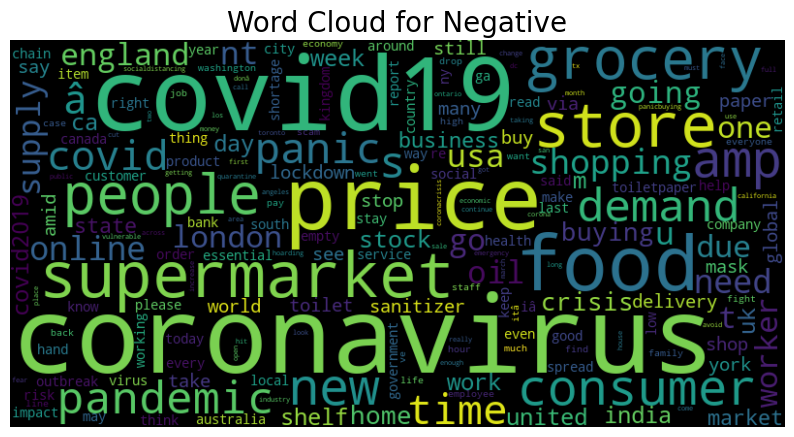

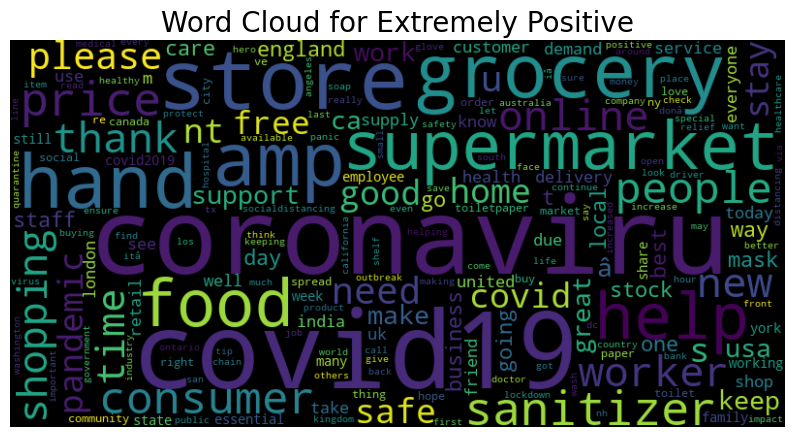

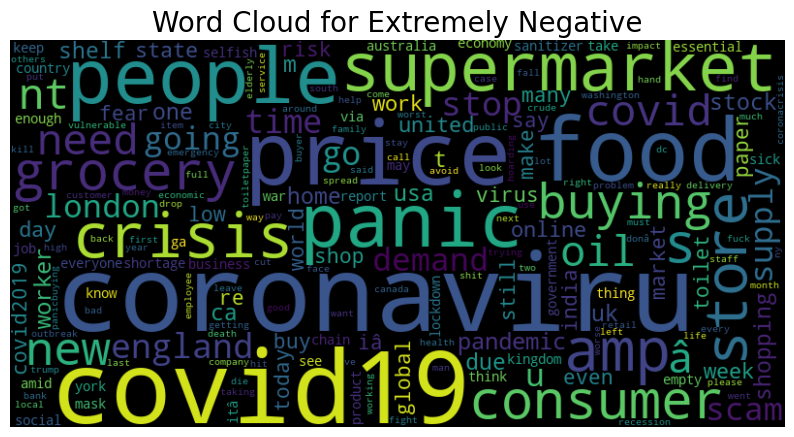

In [65]:
from wordcloud import WordCloud

# Function to create word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment class
for sentiment in df['Sentiment'].unique():
    sentiment_text = ' '.join(df[df['Sentiment'] == sentiment]['CombinedText'])
    create_wordcloud(sentiment_text, f'Word Cloud for {sentiment}')


# Machine learnign algorithm:

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Example DataFrame setup (replace with your actual DataFrame)
# df = pd.read_csv('your_dataframe.csv')

# Step 1: Encode Sentiments
label_encoder = LabelEncoder()
df['EncodedSentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Prepare the feature matrix (X) and the target variable (y)
sentence_vectors = np.vstack(df['SentenceVector'].values)

# Combine sentence vectors (tweet lengths are not included)
X = sentence_vectors
y = df['EncodedSentiment']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict the sentiment for the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                    precision    recall  f1-score   support

Extremely Negative       0.46      0.18      0.26       854
Extremely Positive       0.50      0.31      0.38      1031
          Negative       0.35      0.37      0.36      1549
           Neutral       0.45      0.45      0.45      1240
          Positive       0.36      0.51      0.42      1840

          accuracy                           0.39      6514
         macro avg       0.42      0.37      0.38      6514
      weighted avg       0.41      0.39      0.39      6514



In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Example DataFrame setup (replace with your actual DataFrame)
# df = pd.read_csv('your_dataframe.csv')

# Step 1: Encode Sentiments
label_encoder = LabelEncoder()
df['EncodedSentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Prepare the feature matrix (X) and the target variable (y)
sentence_vectors = np.vstack(df['SentenceVector'].values)

# Combine sentence vectors
X = sentence_vectors
y = df['EncodedSentiment']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the softmax regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Step 4: Predict the sentiment for the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                    precision    recall  f1-score   support

Extremely Negative       0.46      0.18      0.26       854
Extremely Positive       0.50      0.31      0.38      1031
          Negative       0.35      0.37      0.36      1549
           Neutral       0.45      0.45      0.45      1240
          Positive       0.36      0.51      0.42      1840

          accuracy                           0.39      6514
         macro avg       0.42      0.37      0.38      6514
      weighted avg       0.41      0.39      0.39      6514



In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Example DataFrame setup (replace with your actual DataFrame)
# df = pd.read_csv('your_dataframe.csv')

# Step 1: Encode Sentiments
label_encoder = LabelEncoder()
df['EncodedSentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Prepare the feature matrix (X) and the target variable (y)
sentence_vectors = np.vstack(df['SentenceVector'].values)
# Ensure sentence_vectors is numerical and appropriate for GaussianNB

X = sentence_vectors  # Assuming sentence_vectors are numerical
y = df['EncodedSentiment']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 4: Predict the sentiment for the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.23      0.45      0.31       854
           1       0.27      0.60      0.38      1031
           2       0.35      0.17      0.23      1549
           3       0.39      0.44      0.42      1240
           4       0.36      0.08      0.13      1840

    accuracy                           0.30      6514
   macro avg       0.32      0.35      0.29      6514
weighted avg       0.33      0.30      0.27      6514



# DEEP LEARNING - RNN MODELS:

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GRU, Embedding, Input

# # Example DataFrame setup (replace with your actual DataFrame)
# # df = pd.read_csv('your_dataframe.csv')

# # Step 1: Encode Sentiments
# label_encoder = LabelEncoder()
# df['EncodedSentiment'] = label_encoder.fit_transform(df['Sentiment'])

# # Prepare the feature matrix (X) and the target variable (y)
# sentence_vectors = np.vstack(df['SentenceVector'].values)
# tweet_lengths = df['TweetLength'].values.reshape(-1, 1)

# # Combine sentence vectors and tweet lengths
# X = np.hstack((sentence_vectors, tweet_lengths))
# y = df['EncodedSentiment']

# # Step 2: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Build the GRU model
# model = Sequential()
# model.add(Input(shape=(X_train.shape[1], 1)))  # Adjust input shape based on your data
# model.add(GRU(128, return_sequences=True))
# model.add(GRU(64))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Step 4: Train the GRU model
# X_train_expanded = np.expand_dims(X_train, axis=-1)  # Expand dimensions to match GRU input shape
# X_test_expanded = np.expand_dims(X_test, axis=-1)    # Expand dimensions to match GRU input shape

# history = model.fit(X_train_expanded, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Step 5: Predict and evaluate the model
# y_pred = model.predict(X_test_expanded)
# y_pred_classes = np.argmax(y_pred, axis=1)

# print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

2024-07-06 14:25:15.664541: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df is your DataFrame with columns 'CombinedText' and 'Sentiment'

# Step 1: Encode Sentiments
label_encoder = LabelEncoder()
df['EncodedSentiment'] = label_encoder.fit_transform(df['Sentiment'])
num_classes = len(label_encoder.classes_)

# Step 2: Tokenize Text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['CombinedText'])
vocab_size = len(tokenizer.word_index) + 1  # adding 1 because of reserved 0 index
max_length = max(len(sequence) for sequence in tokenizer.texts_to_sequences(df['CombinedText']))

X = tokenizer.texts_to_sequences(df['CombinedText'])
X = pad_sequences(X, maxlen=max_length)

# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, df['EncodedSentiment'], test_size=0.2, random_state=42)

# Step 4: Define the LSTM Model
embedding_dim = 100  # adjust based on your choice
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=15, batch_size=20, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Additional steps:
# - You can save the model using model.save('model_name.h5')
# - You can use the trained model to predict on new data using model.predict(new_data)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df is your DataFrame with columns 'CombinedText' and 'Sentiment'

# Step 1: Encode Sentiments
label_encoder = LabelEncoder()
df['EncodedSentiment'] = label_encoder.fit_transform(df['Sentiment'])
num_classes = len(label_encoder.classes_)

# Step 2: Tokenize Text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['CombinedText'])
vocab_size = len(tokenizer.word_index) + 1  # adding 1 because of reserved 0 index
max_length = max(len(sequence) for sequence in tokenizer.texts_to_sequences(df['CombinedText']))

X = tokenizer.texts_to_sequences(df['CombinedText'])
X = pad_sequences(X, maxlen=max_length)

# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, df['EncodedSentiment'], test_size=0.2, random_state=42)

# Step 4: Define the GRU Model
embedding_dim = 100  # adjust based on your choice
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=50, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

